<a href="https://colab.research.google.com/github/nurulsyafiqah99/P146224_STQD6014-PROJECT2/blob/main/P146224_Project2_STQD6014_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **INTRODUCTION**

NZTech company is a software company that provides and implement the best digital products that are high-quality and relevant based on customer's need and preferences. As a data scientist in this company, i need to identify the potential Apps deveopment that are currently popular and high demand to help the company to improve their sales and productivity. By using a data from kaggle (https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps/data) that are scrapped from Google Play store, i can discover the patterns, trends and insight that can be used to identify the best practice to be applied in this company.

### **PROBLEM STATEMENT**

The company wants to develop a high-end application that can provides potential benefits to the user. The manager does not know what kind of applications that are popular and high demand among users nowadays. They also want to know their potential target market that can used the Apps. The manager wants to know the potential Apps that can be developed to increase their company's reputation and revenue.

### Mount to Google Drive

In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import library

In [2]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

### Read the data

In [3]:
# The data is store in Google Drive folder and use the path to read the file
file_path = '/content/drive/MyDrive/Google-Playstore.csv'
apps = pd.read_csv(file_path)

### **A) DATA CLEANING**

In [4]:
# The info about dataset
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1048574 non-null  object 
 1   App Id             1048575 non-null  object 
 2   Category           1048575 non-null  object 
 3   Rating             1038265 non-null  float64
 4   Rating Count       1038265 non-null  float64
 5   Installs           1048529 non-null  object 
 6   Minimum Installs   1048529 non-null  float64
 7   Maximum Installs   1048575 non-null  int64  
 8   Free               1048575 non-null  bool   
 9   Price              1048575 non-null  float64
 10  Currency           1048513 non-null  object 
 11  Size               1048483 non-null  object 
 12  Minimum Android    1045657 non-null  object 
 13  Developer Id       1048565 non-null  object 
 14  Developer Website  703358 non-null   object 
 15  Developer Email    1048567 non-n

This dataset contains 24 variables (columns) and 1,048,575 data of Apps in Google Play Store.

In [5]:
# Select the important variables that are useful in this analysis
new_apps = apps.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 18]]
new_apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,Everyone
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,Everyone
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,Everyone
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,Everyone


The variable that are used in this analysis is the **App Name(0), App Id(1), Category(2), Rating(3), Rating Count(4), Installs(5), Minimum Installs(6),	Maximum Installs(7), Free(8), Price(9), Currency(10), Size(11)** and **Content Rating(18)**

The variable of Minimum Android(12), Developer Id(13), Developer Website(14), Developer Email(15), Released(16), Last Updated(17), Privacy Policy(19), Ad Supported(20), In App Purchases(21), Editors Choice(22) and Scraped Time(23).

In [6]:
# Check the presence of missing value
new_apps[new_apps.isnull().any(axis=1)]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating
115,VM-Delay,com.irv.vm_delay,Tools,NaN,NaN,50+,50.0,71,True,0.0,USD,Varies with device,Everyone
210,Promotor,com.touchesbegan.promotor,Productivity,NaN,NaN,100+,100.0,135,True,0.0,USD,Varies with device,Everyone
284,xrsta xatr,com.xrsta.xatr,Entertainment,NaN,NaN,10+,10.0,14,True,0.0,USD,Varies with device,Mature 17+
501,GridChats,com.thegridnet.conference,Communication,NaN,NaN,50+,50.0,92,True,0.0,USD,Varies with device,Everyone
662,Restaurant POS(Admin),org.wisdomfish.posadmin,Tools,NaN,NaN,10+,10.0,18,True,0.0,USD,Varies with device,Everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047928,CoffeeMug,com.app.coffeemug,Social,NaN,NaN,100+,100.0,229,True,0.0,USD,Varies with device,Teen
1048192,Digital Signage,ccc.in.androidboxdemo,Tools,NaN,NaN,10+,10.0,15,True,0.0,USD,Varies with device,Everyone
1048432,Grow Tower,com.FangStarMedia.GrowTower,Arcade,NaN,NaN,50+,50.0,51,True,0.0,USD,Varies with device,Everyone 10+
1048550,Tizi Unicorn Town - My Magic Princess Games,com.iz.unicorn.wonder.world.my.pretend.play.to...,Educational,NaN,NaN,"10,000+",10000.0,47563,True,0.0,USD,Varies with device,Everyone


The output above shows the data that contain missing value data in the dataset

In [7]:
# The number of missing value for each variable
missing_counts = new_apps.isnull().sum()
print(missing_counts)

App Name                1
App Id                  0
Category                0
Rating              10310
Rating Count        10310
Installs               46
Minimum Installs       46
Maximum Installs        0
Free                    0
Price                   0
Currency               62
Size                   92
Content Rating          0
dtype: int64


The output above shows the summary of total missing value in each variable. From the output, it shows that Rating and Rating Count has the highest missing value number which is 10,310, App Name contain 1 missing value, Install and Minimum Install have 46 missing values. Meanwhile for Currrency and Size have 62 and 92 missing values accordingly.

In [8]:
# Find the median value for the 'Rating' and 'Rating Count'
median_rating = new_apps['Rating'].median()
print(f"The median rating is: {median_rating}")
median_rating_Count = new_apps['Rating Count'].median()
print(f"The median rating is: {median_rating_Count}")

The median rating is: 3.0
The median rating is: 6.0


In [9]:
# Impute the missing values
new_apps['Rating'] = new_apps['Rating'].fillna(3.0) #replace missing value in Rating with the median value which is 3.0
new_apps['Rating Count'] = new_apps['Rating Count'].fillna(6.0) #replace missing value in Rating Count with median value which is 6.0
new_apps['Installs'] = new_apps['Installs'].fillna('0+') #replace missing value in Installs with 0+
new_apps['Minimum Installs'] = new_apps['Minimum Installs'].fillna(0) #replace missing value in Minimum Installs with 0
new_apps['Currency'] = new_apps['Currency'].fillna('XXX') #replace missing value in Currency with XXX
new_apps['Size'] = new_apps['Size'].fillna('Varies with device') #replace missing value in Size with Varies with device

<ipython-input-9-8f9280a57c07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps['Rating'] = new_apps['Rating'].fillna(3.0) #replace missing value in Rating with the median value which is 3.0
<ipython-input-9-8f9280a57c07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps['Rating Count'] = new_apps['Rating Count'].fillna(6.0) #replace missing value in Rating Count with median value which is 6.0
<ipython-input-9-8f9280a57c07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

The interpretation of the imputation for each variable:

1) Rating and Rating Count - The missing value is replace with the median value which is 3.0 and 6.0 respectively because the data for these variables have a skewed distribution. The median value might make these analysis more meaningful since the median value is less sensitive to the outliers.

2) Installs and Minimum Installs - The missing value in Installs and Minimum Installs is replaced with 0 and 0+ because the missing value in these variables indicate that there is no installation yet for the apps.

3) Currency - The missing value in currency is replace with XXX since XXX in the dataset refers no currency. The missing value in Currency might indicate that there is no currency information available for the apps.

4) Size - The missing values in size is replace with 'Varies with device' since Many apps have variable sizes depending on the device. 'Varies with device' is a reasonable imputation as it's a common occurrence in the Google Play Store.

The imputation of the missing value in the data is done based on the understanding of the datasets nature and concept.

In [10]:
# Check again the number of missing values in data
missing_counts = new_apps.isnull().sum()
print(missing_counts)

App Name            1
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Content Rating      0
dtype: int64


There are only one missing value left which is in App Name

In [11]:
# Drop rows with missing value in column App Name
new_apps.dropna(inplace=True)

<ipython-input-11-12fb885a0ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps.dropna(inplace=True)


The missing value in the variable App Name is decided to be drop from the analysis since the main variable for this analysis is the App Name and App ID. Since there are only 1 missing value, the data can be drop since this dataset contains large number of dataset.

In [12]:
# Check again the number of missing values in data
new_apps.isnull().any().any()

False

After the imputation and removing the data that contain the missing value, there is no missing values observed in the data.

In [13]:
# Check if there are duplicates in the data
new_apps[new_apps.duplicated(subset=['App Id'], keep=False)]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating


There is no duplicate values of App Id in the data

In [14]:
# Adding the new category variable (Rating Group) based on Rating
def categorize_rating(rating):
       if rating >= 4.5:
           return 'Excellent'
       elif rating >= 3.5:
           return 'Good'
       elif rating >= 2.5:
           return 'Average'
       elif rating >= 1.5:
           return 'Poor'
       elif rating == 0.0:
           return 'No Rating'
       else:
           return 'Very Poor'

new_apps['Rating Group'] = new_apps['Rating'].apply(categorize_rating)

<ipython-input-14-a31aa7292f3f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_apps['Rating Group'] = new_apps['Rating'].apply(categorize_rating)


In [15]:
# View the head of the data
new_apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating,Rating Group
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,Everyone,No Rating
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,Everyone,Good
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,Everyone,No Rating
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,Everyone,Excellent
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,Everyone,No Rating


The new category which is Rating Group is added in the analysis to help assist in analysis process and better understanding about the data.

In [16]:
# View the Apps that gets the rating of 5.0
new_apps[new_apps['Rating']== 5.0]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Content Rating,Rating Group
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,Everyone,Excellent
17,All in one shopping app,com.tkapplications.allinoneshoppingapp,Tools,5.0,6.0,50+,50.0,62,True,0.0,USD,2.0M,Everyone,Excellent
42,Niagara Falls Wallpapers,com.niagara.wallpapers.backgrounds_0001,Personalization,5.0,11.0,500+,500.0,825,True,0.0,USD,21M,Teen,Excellent
43,Extrude Balance,com.creatorsbureau.extrudebalance,Arcade,5.0,8.0,"1,000+",1000.0,3427,True,0.0,USD,26M,Everyone,Excellent
72,Triple Point Academy,co.varys.sinbd,Education,5.0,5.0,10+,10.0,18,True,0.0,USD,38M,Everyone,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048425,Bihar STET Paper-1 (English) Mock Tests App,com.edugorilla.biharstetenglish,Education,5.0,7.0,500+,500.0,516,True,0.0,USD,15M,Everyone,Excellent
1048447,কিসমিস খাওয়ার উপকারিতা,com.boishakhiapps.KismiserUpokarita,Books & Reference,5.0,5.0,"1,000+",1000.0,2785,True,0.0,USD,2.1M,Everyone,Excellent
1048469,HarineTaxi_Owner,cockatoo.harinetaxi_owner,Maps & Navigation,5.0,16.0,50+,50.0,62,True,0.0,USD,4.0M,Everyone,Excellent
1048480,DungScape,com.starman.celestialdungeons,Adventure,5.0,20.0,100+,100.0,225,True,0.0,USD,36M,Everyone,Excellent


### **B) DATA VISUALIZATIONS**

### Objective 1: To identify the top 10 Apps that are mostly installed by the user

In [17]:
# Group the data by 'App Name' and sum 'Maximum Installs'
top_apps = new_apps.groupby('App Name')['Maximum Installs'].sum().sort_values(ascending=False)

# Display to 10 Apps that are mostly installed by the user
top_apps = top_apps.head(10)
top_apps

,Maximum Installs
App Name,
YouTube,9766230924
Google Chrome: Fast & Secure,8925640788
Google Drive,7028265259
WhatsApp Messenger,6265637751
Google TV (previously Play Movies & TV),6156518915
Hangouts,5019518222
Instagram,3559871277
"Google Play Books - Ebooks, Audiobooks, and Comics",3202676731
Google Calendar,2651720962


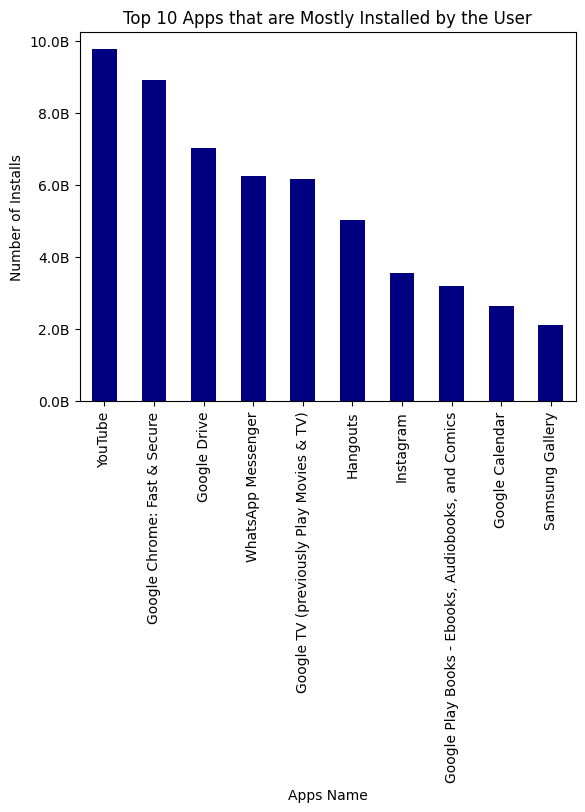

In [18]:
# Bar Graph
top_apps.plot.bar(color='navy', title = 'Top 10 Apps that are Mostly Installed by the User')
plt.xlabel('Apps Name') #x-axis name
plt.ylabel('Number of Installs') #y-axis name

# Convert the number into Bilion format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

# Display the graph
plt.show()

From the graph, it shows that YouTube is the most popular Apps with the highest number of installs which is 9.7 bilion. Next, Google Chrome and Google Drive becomes the second and third most popular apps in Google Play Store followed by WhatsApp Messenger, Google TV, Hangouts, Instagram, Google Play Books, Google Calendar and Samsung Gallery.

### Objective 2: To determine the distribution of rating given by the user

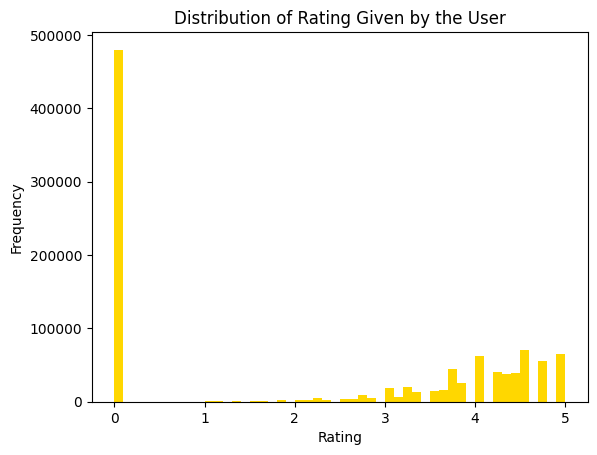

In [19]:
# Histogram plot
new_apps['Rating'].plot.hist(bins=50, color = 'gold')
plt.xlabel('Rating') #x-axis name
plt.ylabel('Frequency') #y-axis name
plt.title('Distribution of Rating Given by the User') #Graph title

# Display the graph
plt.show()

From the histogram plot above, it shows that most of the Apps in Google Play Store does not have any rating from the user. If the apps have a rating (condider the lowest is 1 and the highest is 5), we can see that most of the Apps get highest rating which is in the range of 4 to 5. This shows that the user tend to give honest rating if the Apps that are developed is good. This analysis gives a good insight to the company to develop the useful Apps and make an Apps with the rating of 5 as the reference.

By using median approach for the imputation in missing value in 'Rating', there is no difference since many of the apps in Google Play Store have 0 rating by the user.

### Objective 3: To identify the top categories in Goolgle Play Store that obtained excellent rating from the user

In [20]:
# Filter for the Apps with 'Excellent' rating
excellent_apps = new_apps[new_apps['Rating Group'] == 'Excellent']

# Group by 'Category' and count the number of apps from 'Excellent' rating
top_categories = excellent_apps.groupby('Category')['App Name'].count()

# Sort the categories in descending order
top_categories = top_categories.sort_values(ascending=False)

# Display the top categories
top_categories = top_categories.head(10)
top_categories

,App Name
Category,
Education,23704
Music & Audio,16774
Books & Reference,14294
Entertainment,10714
Personalization,9879
Lifestyle,9842
Tools,9099
Business,8114
Shopping,6575


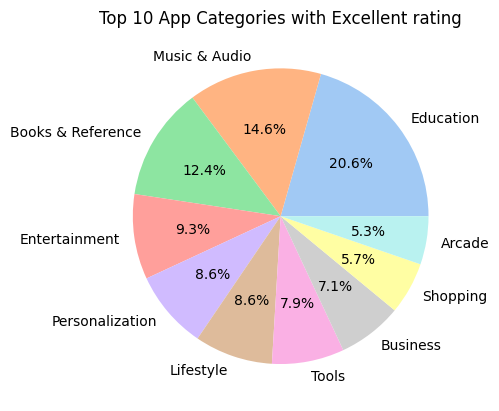

In [21]:
# Pie chart
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors = sns.color_palette("pastel"))
plt.title('Top 10 App Categories with Excellent rating')

# Display the chart
plt.show()

Pie chart above shows the results of the top Apps category in Google Play Store from the excellent rating group. From the pie chart above, it shows that Education is the top category in Google Play Store with percentage of 20.6 per cent followed by Music & Audio category and Book & Reference with 14.6 per cent and 12.4 per cent accordingly. The company can consider to build an educational purpose Apps as it is the top categories that gets excellent rating from the user.

### Objective 4: To identify the popular Apps in Education category for free and paid Apps

In [22]:
# Filter the Category group that is Education
education_apps = new_apps[new_apps['Category'] == 'Education']

# Sort the data from Education category based on maximum install
top_education_apps = education_apps.sort_values(by=['Maximum Installs'], ascending=False)

# Get the top 5 of the top apps in Education category
top_5_education_apps = top_education_apps.head(5)
top_5_education_apps = top_5_education_apps[['App Name', 'Maximum Installs', 'Free']]
top_5_education_apps

,App Name,Maximum Installs,Free
122353,Google Classroom,212017279,True
695655,Photomath,147356790,True
178286,U-Dictionary: Oxford Dictionary Free Now Trans...,125828709,True
314926,BYJU'S – The Learning App,91499985,True
829069,Cake - Learn English for Free,69941784,True


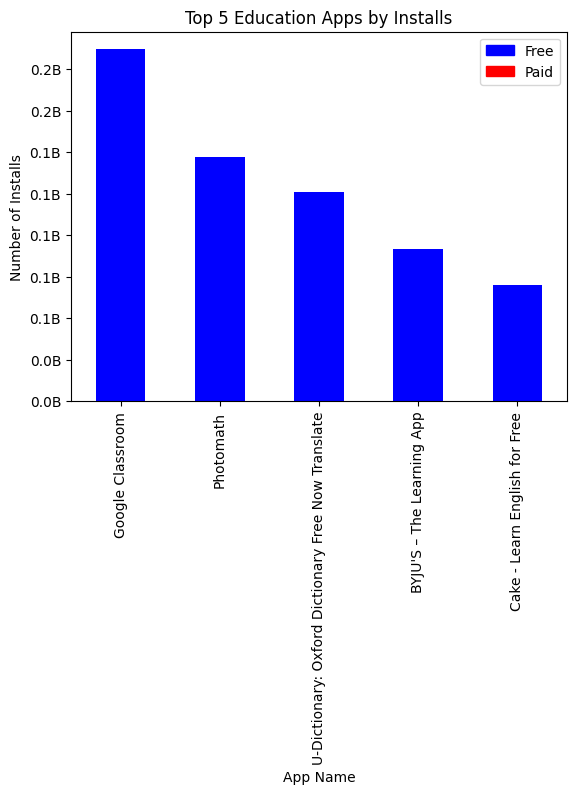

In [23]:
# Bar plot
top_5_education_apps = top_5_education_apps.set_index('App Name')

# Set the colour for free and paid apps
colors = ['blue' if is_free else 'red' for is_free in top_5_education_apps['Free']]
top_5_education_apps['Maximum Installs'].plot.bar(color=colors, title='Top 5 Education Apps by Installs')
plt.xlabel('App Name') #x-axis name
plt.ylabel('Number of Installs') #y-axis name

# Graph Legend
blue_patch = mpatches.Patch(color='blue', label='Free')
red_patch = mpatches.Patch(color='red', label='Paid')
plt.legend(handles=[blue_patch, red_patch])

# Convert the number into Bilion format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

# Display the graph
plt.show()

The output shows that in Education category, Google Classroom is the top apps with the highest installed number followed by photomath, U-dictionary, BYJU'S and Cake. The graph shows that all of the top 5 apps that obtained the highest number of installed by the user is a free apps. It shows that user consider to install a free apps compared to the paid app. Hence, the company should consider to implement a free apps that are useful to the user.

Modify the plot to display both free and paid apps:

In [24]:
# Filter the Category group that is Education and Free apps
education_free_apps = new_apps[(new_apps['Category'] == 'Education') & (new_apps['Free']== True)]

# Sort the data from Education category based on maximum install
top_education_free_apps = education_free_apps.sort_values(by=['Maximum Installs'], ascending=False)

# Get the top 5 of the top apps in Education category
top_5_education_free_apps = top_education_free_apps.head(5)
top_5_education_free_apps = top_5_education_free_apps[['App Name', 'Maximum Installs', 'Free']]
top_5_education_free_apps

,App Name,Maximum Installs,Free
122353,Google Classroom,212017279,True
695655,Photomath,147356790,True
178286,U-Dictionary: Oxford Dictionary Free Now Trans...,125828709,True
314926,BYJU'S – The Learning App,91499985,True
829069,Cake - Learn English for Free,69941784,True


In [25]:
# Filter the Category group that is Education and Paid apps
education_paid_apps = new_apps[(new_apps['Category'] == 'Education') & (new_apps['Free']== False)]

# Sort the data from Education category based on maximum install
top_education_paid_apps = education_paid_apps.sort_values(by=['Maximum Installs'], ascending=False)

# Get the top 5 of the top apps in Education category
top_5_education_paid_apps = top_education_paid_apps.head(5)
top_5_education_paid_apps = top_5_education_paid_apps[['App Name', 'Maximum Installs', 'Free']]
top_5_education_paid_apps

,App Name,Maximum Installs,Free
903078,Toca Lab: Elements,793967,False
260116,Toca Life: City,567811,False
861489,Official DVSA Theory Test Kit,497137,False
785694,Toca Life: Vacation,270398,False
553339,Lecture Notes - Classroom Notes Made Simple,218573,False


<ipython-input-26-b5f034d1e3be>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-26-b5f034d1e3be>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


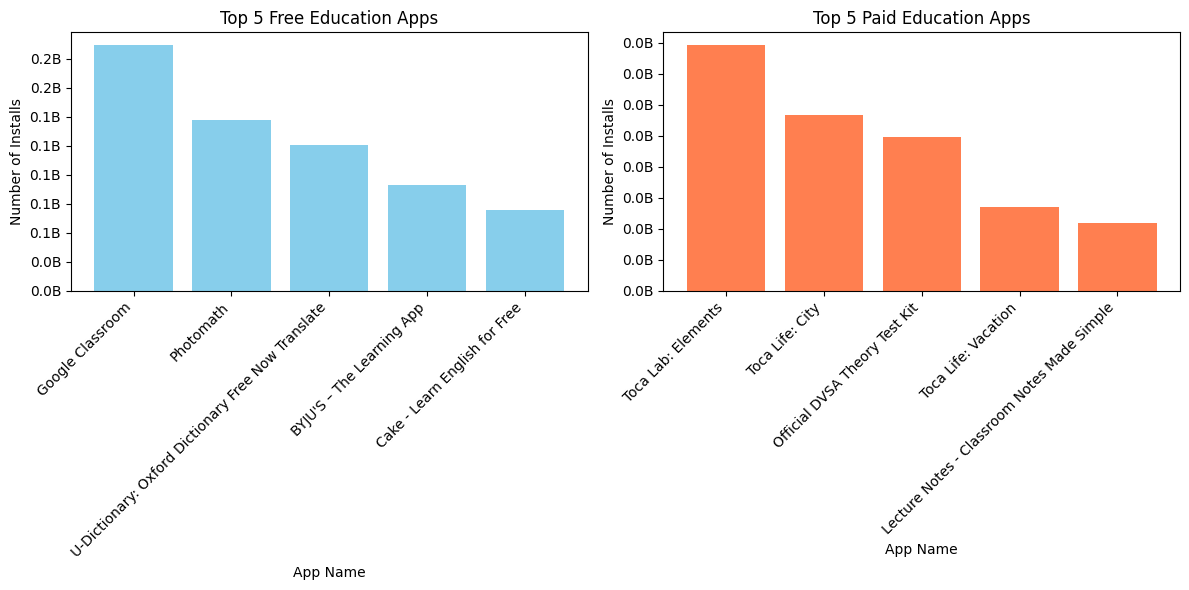

In [26]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot free apps
axes[0].bar(top_5_education_free_apps['App Name'], top_5_education_free_apps['Maximum Installs'], color='skyblue')
axes[0].set_title('Top 5 Free Education Apps')
axes[0].set_xlabel('App Name')
axes[0].set_ylabel('Number of Installs')
# Rotate x-axis labels and align them to the right
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

# Plot paid apps
axes[1].bar(top_5_education_paid_apps['App Name'], top_5_education_paid_apps['Maximum Installs'], color='coral')
axes[1].set_title('Top 5 Paid Education Apps')
axes[1].set_xlabel('App Name')
axes[1].set_ylabel('Number of Installs')
# Rotate x-axis labels and align them to the right
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B'))

# Adjust layout and display
plt.tight_layout()
plt.show()

The bar graph above shows the top 5 free and paid apps installed in Education category. From the graph, it shows that for free apps, Google Classroom has the highest installed number by the user followed by Photomath, U-Dictionary: Oxford Dictionary Free Now Translate, BYJU's - The Learning App and Cake - Learn English for Free. Meanwhile, for the paid apps, Toca Lab: Elements is the most popular apps with the highest number of installed followed by Toca Life: City, Official DVSA Theory Test Kit, Toca Life: Vacation and Lecture Notes - Classroom Notes Made Simple.

### Objective 5: To analyse popular Apps install based on content rating category for free and paid apps

In [27]:
# Group data by 'Content Rating' and 'Free' and then calculate mean 'Maximum Installs'
content_data = new_apps.groupby(['Content Rating', 'Free'])['Maximum Installs'].mean().reset_index()
content_data

,Content Rating,Free,Maximum Installs
0,Adults only 18+,True,1.987565e+05
1,Everyone,False,1.169835e+04
2,Everyone,True,2.450514e+05
3,Everyone 10+,False,1.033311e+05
4,Everyone 10+,True,1.298493e+06
5,Mature 17+,False,1.195263e+05
6,Mature 17+,True,3.598273e+05
7,Teen,False,4.384690e+04
8,Teen,True,7.949451e+05
9,Unrated,False,3.400000e+01


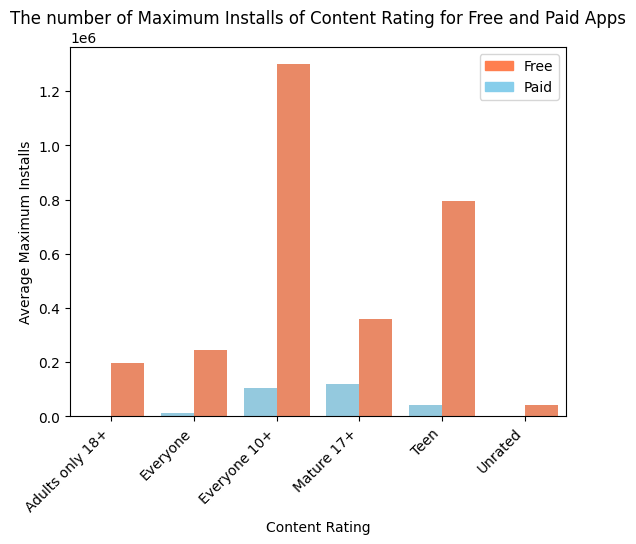

In [28]:
# Grouped bar chart
sns.barplot(x='Content Rating', y='Maximum Installs', hue='Free', palette = ['skyblue','coral'], data=content_data)
plt.xlabel('Content Rating') #x- axis name
plt.ylabel('Average Maximum Installs') #y-axis name
plt.title('The number of Maximum Installs of Content Rating for Free and Paid Apps') #Graph title
plt.xticks(rotation=45, ha='right') #label position

# Grapgh legend
free = mpatches.Patch(color='coral', label='Free') #define legend label and color for free apps
paid = mpatches.Patch(color='skyblue', label='Paid') #define legend label and color for paid apps
plt.legend(handles=[free, paid])

# Display the graph
plt.show()

The grouped bar chart shows the number of installed for each Content Rating which is Adults only 18+, Everyone, Everyone 10+, Mature 17+, Teen and Unrated for free and paid apps. The graph shows that the category of Everyone 10+ has the highest number of installed by user for free apps. Meanwhile, for paid apps, Mature 17+ being the top apps that has highest number of installed compared to the others Content Rating category. The company can decide to develop an Apps for Everyone 10+ if the Apps is free and Mature 17+ category if the Apps is paid.

### **CONCLUSION**

Based on the results above, the company can develop an educational applications that are useful to the users and provide benefits in the use of application by using Youtube and Google Classroom as the references since both apps are popular among users. This is because most of the users install an apps from Google Play Store from Education category. There are several factors why this category is high demand in Google Play Store. The expanding demand of learning is growing as technology makes the education system more accessible to everyone. Education apps usually offers a wide range of users since it is a learning apps that are very useful to the users. The analysis also shows that the content rating of the users above 10 years old has the highest number of install compared to the other content rating that are restricted to certain age. The company can develop an free apps for higher insight since most of the users prefer free apps compared to the paid apps. This can helps the company to showcase the skills and  build portfolio for a long term sustainablity to the users.